# Introduction aux régressions linéaires sur Python : Correction

Ceci est un cours d'introduction aux régressions linéaires sur Pyhton. L'objectif est de pouvoir importer des données, effectuer des régressions linéaires, de comprendre et savoir interpréter les sorties de Python mais aussi de vérifier l'adéquation du modèle.

## Support

Pour ce tutoriel, Jupyter Notebook sera utilisé.

## Gestion et création de cellules

Sur un notebook, vous pouvez écrire du texte et des cellules de code en Python.
Pour transformer une cellule de code en texte, cliquez sur la cellule et appuyez sur Echap + M. Pour faire l'inverse, sélectionnez la zone de texte et appuyez sur Echap + Y.
Pour éxecuter le code d'une cellule, appuyez sur Ctrl + Enter.
Pour éxecuter et créer une nouvelle cellule Maj + Enter .


## Importer les packages

In [46]:
#load libraries
import numpy as np         # linear algebra
import pandas as pd        # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy import stats #permet régression linéaire simple
import statsmodels.api as sm 
import statsmodels.formula.api as smf #permet de faire régression liéaire avec les mêmes formules que sur R
from statsmodels.regression.linear_model import OLS #permet régression linéaire multiple

### 1) Importer des données

Pour importer des données, vous pouvez les télécharger localement et les ouvrir en précisant le chemin d'accès ou directement les ouvrir à partir d'un dépot Github.
Dans ce TP, nous allons nous intéresser à un sous-échantillon de la cohorte Paquid. 
Cette cohorte a été constituée dans le but d’étudier le vieillissement cérébral normal et pathologique chez des 
sujets de plus de 65 ans, vivant à domicile en Gironde et en Dordogne. Les sujets ont été tirés au 
sort sur les listes électorales entre 1988 et 1990.

Les sujets inclus dans l’étude ont été interrogés à l’aide d’un questionnaire standardisé lors de la 
visite initiale (T0), et lors des suivis à 1 an, 3 ans, 5 ans et 8 ans après la visite initiale. 
A chaque visite, des informations concernant les caractéristiques sociodémographiques, les conditions de 
vie, l’état de santé et les performances intellectuelles des sujets ont été recueillies. Pour évaluer 
les performances cognitives, plusieurs tests psychométriques ont été utilisés, parmi lesquels : le 
Mini Mental State Examination (MMSE) mesurant la performance cognitive globale, le test de 
rétention visuelle de Benton, le test d’Isaac utilisé pour explorer l’évocation lexicale, le test de 
barrages de Zazzo et le test de raisonnement logique simple de Wechsler.
Dans cet exercice, nous nous intéressons au test de **Wechsler** nécessite une bonne capacité 
d’attention et présente une composante vitesse. Il se présente sous la forme d’une table qui sert 
de modèle et décrit neuf paires constituées d’un chiffre et d’un symbole, et d’une seconde table qui 
ne comporte que des chiffres et des cases vides. En se servant du modèle qui figure en haut de la 
feuille, le sujet doit compléter le plus de cases possible dans la seconde table en écrivant le 
symbole correspondant sous chaque chiffre proposé. Le score total est le nombre de cases 
correctement remplies en 90 secondes ; le score maximum est 93.
L’objectif principal de cette étude est d’étudier la relation entre le score du test de Wechsler à la 
visite initiale et différentes caractéristiques des sujets.

Les données sont dans le fichier *cweschler.txt*. Il contient des informations sur 501 sujets :

* ayant effectués les cinq tests précités à T0, T1, T3 et T5,
* ayant été vus à T8 et non déments à T8,
* n’étant ni sourds, ni aveugles ;
* n’étant pas confinés au lit ;
* n’ayant pas eu d’AVC, ni de traumatismes crâniens pendant les 5 premières années de suivi.

Les variables disponibles sont les suivantes :

numero : numéro d’identification

*age* : âge à T0 (en années)

*sexe* : sexe
* 0=hommes
* 1=femmes

metier : profession
* 0=femme au foyer
* 1=ouvrier agricole
* 2=exploitant agricole
* 3=employé de service
* 4=ouvrier
* 5=artisan-commerçant
* 6=autres employés
* 7=profession intellectuelle

*codew0* : score au test de Wechsler à T0

*comvin* : consommation de vin déclarée à T0
* 0=non buveur
* 1=1/4 de litre /jour
* 2=1/2 litre /jour ou plus

*certif *: niveau d’études
* 0=sans certificat d’études primaire
* 1=avec certificat d’études primaire


In [47]:
data = pd.read_csv("./cweschler.csv",sep=";")
# Pour  les utilisateurs Google colab
#url = 'https://raw.githubusercontent.com/jremiat/Regression/main/data/cweschler.csv'
#data = pd.read_csv(url)
data

,NUMERO,AGE,SEXE,METIER,CODEW0,COMVIN,CERTIF
0,66,72,1,4,22,1,0
1,68,66,0,6,54,2,1
2,78,73,1,6,46,1,1
3,79,67,0,7,52,2,1
4,81,73,0,7,38,1,1
...,...,...,...,...,...,...,...
496,5156,68,0,6,22,1,1
497,5158,66,1,3,36,0,0
498,5160,70,0,6,56,1,1
499,5161,71,0,4,43,2,1


In [48]:
data.head(5)

,NUMERO,AGE,SEXE,METIER,CODEW0,COMVIN,CERTIF
0,66,72,1,4,22,1,0
1,68,66,0,6,54,2,1
2,78,73,1,6,46,1,1
3,79,67,0,7,52,2,1
4,81,73,0,7,38,1,1


## Statistiques descriptives

### 2) Décrire la distribution de l'âge et du score à l'aide de graphiques appropriés

(array([ 1., 11., 14., 21., 39., 63., 61., 45., 46., 47., 52., 27., 27.,
        18., 11., 11.,  2.,  1.,  1.,  3.]),
 array([11.  , 13.95, 16.9 , 19.85, 22.8 , 25.75, 28.7 , 31.65, 34.6 ,
        37.55, 40.5 , 43.45, 46.4 , 49.35, 52.3 , 55.25, 58.2 , 61.15,
        64.1 , 67.05, 70.  ]),
 <BarContainer object of 20 artists>)

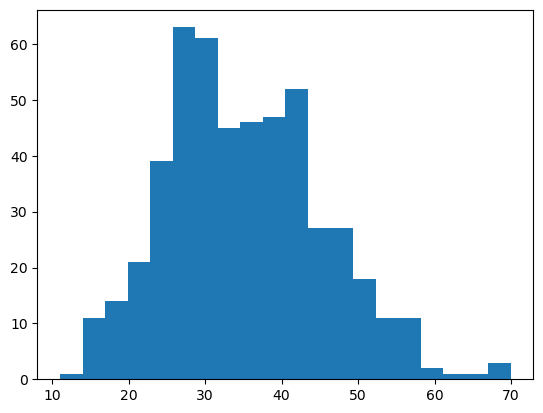

In [49]:
plt.hist(data.filter(["CODEW0"]), bins=20)

(array([92., 69., 62., 32., 32., 29., 45., 32., 18., 26., 12., 12.,  8.,
        19.,  4.,  1.,  1.,  5.,  0.,  2.]),
 array([65.  , 66.15, 67.3 , 68.45, 69.6 , 70.75, 71.9 , 73.05, 74.2 ,
        75.35, 76.5 , 77.65, 78.8 , 79.95, 81.1 , 82.25, 83.4 , 84.55,
        85.7 , 86.85, 88.  ]),
 <BarContainer object of 20 artists>)

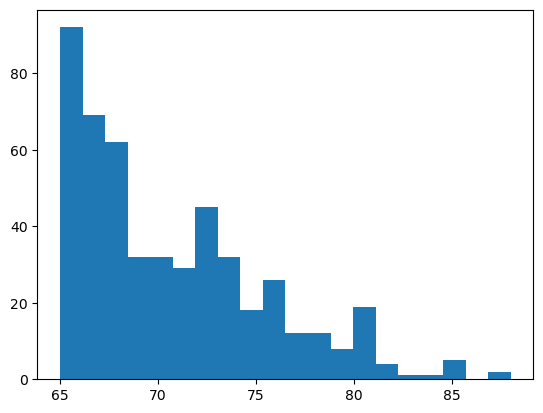

In [50]:
plt.hist(data.filter(["AGE"]), bins=20)

### 3) Décrire numériquement toutes les variables

#### a) Variable quantitative


In [51]:
quanti=data.filter(["AGE","CODEW0"])
quanti.describe()

,AGE,CODEW0
count,501.000000,501.000000
mean,70.804391,35.165669
std,4.730080,10.424514
min,65.000000,11.000000
25%,67.000000,27.000000
50%,69.000000,34.000000
75%,74.000000,42.000000
max,88.000000,70.000000


#### b) Variable catégorielle


In [52]:
quali=data.filter(["SEXE","METIER","COMVIN","CERTIF"])
quali.apply(lambda x: x.value_counts())

,SEXE,METIER,COMVIN,CERTIF
0,221.0,44,200.0,304.0
1,280.0,10,205.0,197.0
2,NaN,26,96.0,NaN
3,NaN,29,NaN,NaN
4,NaN,63,NaN,NaN
5,NaN,62,NaN,NaN
6,NaN,178,NaN,NaN
7,NaN,89,NaN,NaN


## Régression linéaire simple

### 3) Estimer l'association brute entre le score au test de Wechsler et l'âge (en quantitatif)
#### a) Sur papier : 
###### i) Ecrire l'équations du modèle
$CODEW0_i=\beta_0+\beta_1AGE_i+\epsilon_i$

##### ii) Donner les conditions d'applications de ce modèle et ce qu'elles signifient concrètement ici
Les 4 conditions sont homocédasticités, normalité, linéarité et indépendance.

* Homocédasticité:  Pour chaque âge, la variable score est dispersée avec la même amplitude : $Var(CODEW0|Age)=s^2$
* Linéarité: Quand on augmente d'un an d'âge, le score moyen augmente de $\beta_1$ ou E($\epsilon_i$)=0
* Normalité: Pour un âge fixé, la variable score doit avoir une distribution normale $CODEW0_i|Age_i\sim \mathcal{N}$
* Indépendance : le score d'un individu i n'influence pas celui de j : pas d'appariement, d'avant/après.
##### iii) Donner l'interprétation des coefficients de l'équation
#### b) A partir des données :
##### i) Tracer les graphiques nécessaires pour étudier les conditions d'application de modèle


(array([ 1., 11., 14., 21., 39., 63., 61., 45., 46., 47., 52., 27., 27.,
        18., 11., 11.,  2.,  1.,  1.,  3.]),
 array([11.  , 13.95, 16.9 , 19.85, 22.8 , 25.75, 28.7 , 31.65, 34.6 ,
        37.55, 40.5 , 43.45, 46.4 , 49.35, 52.3 , 55.25, 58.2 , 61.15,
        64.1 , 67.05, 70.  ]),
 <BarContainer object of 20 artists>)

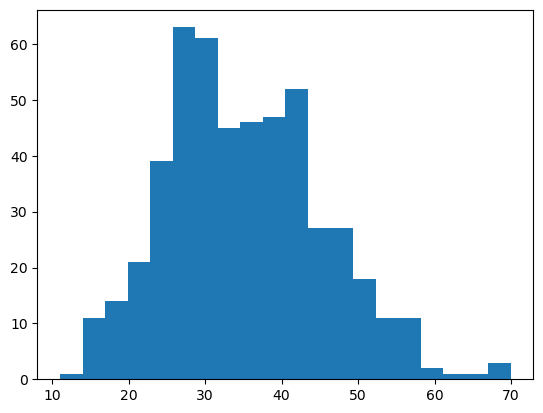

In [53]:
#selection de la deuxième colonne de notre dataset (l'age)
X = data.iloc[0:len(data),1]
#selection de cinquième colonne de notre dataset (le score obtenu)
Y = data.iloc[0:len(data),4] 

#distribution du score
plt.hist(Y, bins=20)



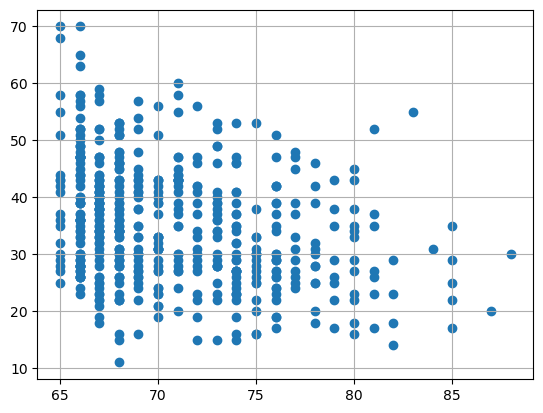

In [54]:
#Nuage de points
axes = plt.axes()
axes.grid() # dessiner une grille pour une meilleur lisibilité du graphe
plt.scatter(X,Y) # X et Y sont les variables qu'on a extraite 
plt.show()

##### ii) Estimer le coefficient de corrélation de Pearson entre les deux variables

In [55]:
stats.pearsonr(data.iloc[0:len(data),1], data.iloc[0:len(data),4])

PearsonRResult(statistic=-0.3073190121482897, pvalue=2.0294950515514917e-12)

##### iii) Estimer le modèle

In [56]:
mod1 = smf.ols(formula='CODEW0 ~  AGE ', data=data)
modele1 = mod1.fit()
 
print(modele1.summary())

                            OLS Regression Results                            
Dep. Variable:                 CODEW0   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     52.04
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           2.03e-12
Time:                        16:54:35   Log-Likelihood:                -1860.0
No. Observations:                 501   AIC:                             3724.
Df Residuals:                     499   BIC:                             3732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.1210      6.662     12.476      0.0

In [57]:
#Autre méthode
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)
print(stats.linregress(X, Y))

LinregressResult(slope=-0.6772932315265199, intercept=83.1210035966871, rvalue=-0.3073190121482895, pvalue=2.029495051551611e-12, stderr=0.0938846208195825, intercept_stderr=6.662230787538228)


In [58]:
#Autre méthode
slope, intercept, r_value, p_value, std_err = stats.linregress(data.iloc[0:len(data),1], data.iloc[0:len(data),4])
print(stats.linregress(data.iloc[0:len(data),1], data.iloc[0:len(data),4]))


LinregressResult(slope=-0.6772932315265199, intercept=83.1210035966871, rvalue=-0.3073190121482895, pvalue=2.029495051551611e-12, stderr=0.0938846208195825, intercept_stderr=6.662230787538228)


In [59]:
#Autre méthode :
# Récupérer l'ensemble des valeurs de la variable cible
Y = data["CODEW0"]
# Récupérer les variables prédictives et ajouter constante pour avoir intercept 
X = sm.add_constant(data[['AGE']])

est = OLS(Y, X).fit()
 
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 CODEW0   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     52.04
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           2.03e-12
Time:                        16:54:35   Log-Likelihood:                -1860.0
No. Observations:                 501   AIC:                             3724.
Df Residuals:                     499   BIC:                             3732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.1210      6.662     12.476      0.0

In [60]:
#Si on veut pour 10 ans d'âge
data['AGE10']=data['AGE']/10
mod1bis = smf.ols(formula='CODEW0 ~  AGE10 ', data=data)
modele1bis = mod1bis.fit()
 
print(modele1bis.summary())

                            OLS Regression Results                            
Dep. Variable:                 CODEW0   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     52.04
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           2.03e-12
Time:                        16:54:35   Log-Likelihood:                -1860.0
No. Observations:                 501   AIC:                             3724.
Df Residuals:                     499   BIC:                             3732.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     83.1210      6.662     12.476      0.0

##### iv) Présenter dans un tableau les résultats
Mesure d’association brute entre score et âge du sous échantillon de la cohorte Paquid (n=501) 
| Variables | Différence moyenne estimée au score de Weschler | IC à 95% | P-valeur|
| --- | --- | --- | --- |
| Age (pour 10 ans) | -6.77 | -8.62;-4.93 | <0.001 |

##### v) Interprétation des résultats

### 4) Estimer l'association brute entre le score et le sexe 

#### a) Ecrire sur papier l'équation du modèle
$CODEW0_i=\beta_0+\beta_1SEXE_i+\epsilon_i$
#### b) Estimer le modèle et interpréter les résultats

In [61]:
mod2 = smf.ols(formula='CODEW0 ~  SEXE ', data=data)
modele2 = mod2.fit()
 
print(modele2.summary())

                            OLS Regression Results                            
Dep. Variable:                 CODEW0   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     10.13
Date:                Mon, 13 Nov 2023   Prob (F-statistic):            0.00155
Time:                        16:54:35   Log-Likelihood:                -1879.8
No. Observations:                 501   AIC:                             3764.
Df Residuals:                     499   BIC:                             3772.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.8190      0.695     52.984      0.0

### 5) Estimer l'association brute entre le score et le niveau d'étude

#### a) Sur papier, écrire l'équation du modèle
$CODEW0_i=\beta_0+\beta_1Certif_i+\epsilon_i$

#### b) Estimer le modèle et interpréter les résultats

In [62]:
mod3 = smf.ols(formula='CODEW0 ~  CERTIF ', data=data)
modele3 = mod3.fit()
 
print(modele3.summary())

                            OLS Regression Results                            
Dep. Variable:                 CODEW0   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     159.2
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           7.16e-32
Time:                        16:54:35   Log-Likelihood:                -1815.5
No. Observations:                 501   AIC:                             3635.
Df Residuals:                     499   BIC:                             3643.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.0428      0.521     59.571      0.0

## Régresssion linéaire multiple : association entre le score et la consommation de vin, ajustée sur l'âge et le niveau d'éducation
### a) Sur papier, écrire l'équation du modèle
$CODEW0_i=\beta_0+\beta_1Comvin1_i+\beta_2Comvin2_i+\beta_3age_i+\beta_4Certif_i+\epsilon_i$
### b) Estimer le modèle et interpréter les résultats
D'après l'équation, on voit qu'il faut créer 2 variables indicatrices pour la consommation de vin pour obtenir les deux $\beta$ correspondants

In [63]:
data['COMVIN1']=np.where(data['COMVIN']==1,1,0)
data['COMVIN2']=np.where(data['COMVIN']==2,1,0)
data.head()

,NUMERO,AGE,SEXE,METIER,CODEW0,COMVIN,CERTIF,AGE10,COMVIN1,COMVIN2
0,66,72,1,4,22,1,0,7.2,1,0
1,68,66,0,6,54,2,1,6.6,0,1
2,78,73,1,6,46,1,1,7.3,1,0
3,79,67,0,7,52,2,1,6.7,0,1
4,81,73,0,7,38,1,1,7.3,1,0


In [64]:
# Récupérer l'ensemble des valeurs de la variable cible
Y = data["CODEW0"]
# Récupérer les variables prédictives et ajouter constante pour avoir intercept 
X = sm.add_constant(data[['AGE','CERTIF','COMVIN1','COMVIN2']])

est = OLS(Y, X).fit()
 
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 CODEW0   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     54.21
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           6.63e-38
Time:                        16:54:35   Log-Likelihood:                -1794.0
No. Observations:                 501   AIC:                             3598.
Df Residuals:                     496   BIC:                             3619.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.7693      5.974     11.680      0.0

### c) Etudier l'adéquation du modèle à partir des résidus
Normalité

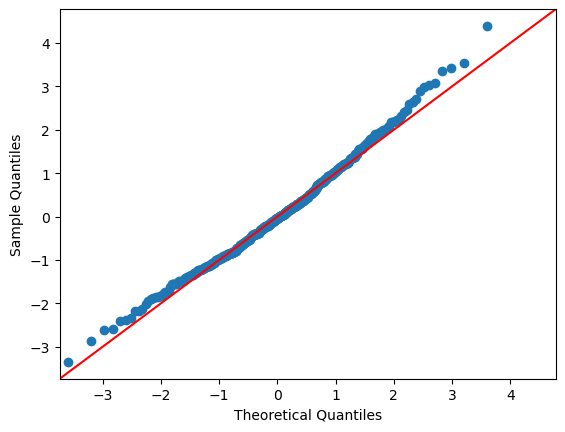

In [65]:
res=est.resid
fig = sm.qqplot(res,stats.t,fit=True, line='45')

(array([ 1.,  3.,  3., 11., 18., 40., 63., 66., 78., 74., 42., 42., 22.,
        18.,  8.,  4.,  4.,  3.,  0.,  1.]),
 array([-26.6741248 , -23.61764333, -20.56116185, -17.50468038,
        -14.44819891, -11.39171743,  -8.33523596,  -5.27875448,
         -2.22227301,   0.83420846,   3.89068994,   6.94717141,
         10.00365288,  13.06013436,  16.11661583,  19.1730973 ,
         22.22957878,  25.28606025,  28.34254173,  31.3990232 ,
         34.45550467]),
 <BarContainer object of 20 artists>)

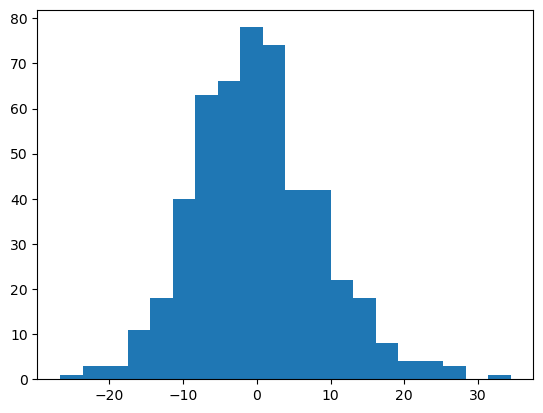

In [66]:
plt.hist(res, bins=20)

Homocédasticité et linéarite :
Résidus en fonction des variables explicatives

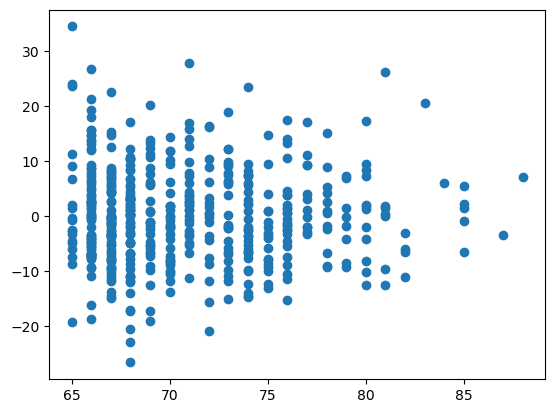

In [67]:
plt.scatter(data['AGE'],res)

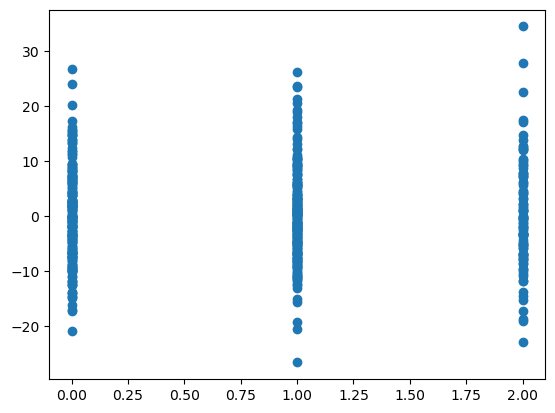

In [68]:
plt.scatter(data['COMVIN'],res)

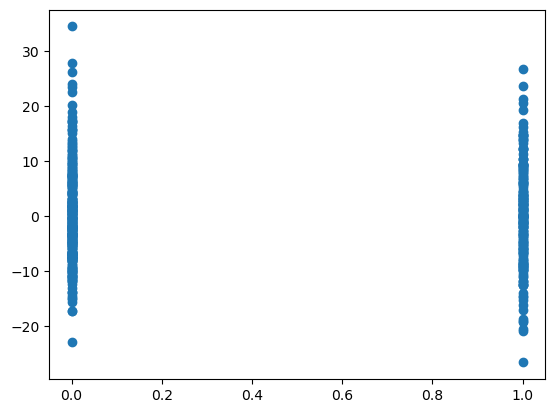

In [69]:
plt.scatter(data['CERTIF'],res)

Homocédasticité:
Résidus en fonction des valeurs prédites

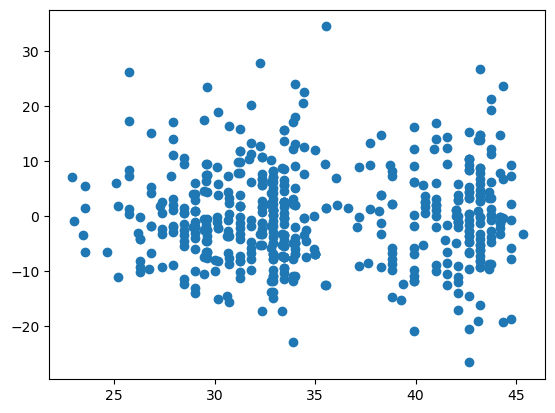

In [70]:
predictions = est.predict(X)
plt.scatter(predictions,res)

### d) Etude d'interaction
 Etudier si l’association entre la consommation de vin et le score à T0 diffère chez les hommes 
et chez les femmes de même âge et de même niveau d’éducation.
#### i) Ecrire sur papier l'équation du modèle
$CodeW0_i=\beta_0+\beta_1Comvin1_i+\beta_2Comvin2_i+\beta_3Sexe_i+\beta_4Age_i+\beta_5Comvin1_i\times Sexe_i+\beta_6Comvin2_i\times Sexe_i+\epsilon_i$
#### ii) Estimer le modèle avec l'interaction nécessaire, interpréter pour la consommation de vin

In [71]:
mod = smf.ols(formula='CODEW0 ~ COMVIN1 + COMVIN2 + SEXE + AGE10 + COMVIN1:SEXE +COMVIN2:SEXE', data=data)
modele = mod.fit()
 
print(modele.summary())

                            OLS Regression Results                            
Dep. Variable:                 CODEW0   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     10.81
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           2.57e-11
Time:                        16:54:35   Log-Likelihood:                -1853.9
No. Observations:                 501   AIC:                             3722.
Df Residuals:                     494   BIC:                             3751.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       84.3946      6.709     12.580   

In [72]:
modbis = smf.ols(formula='CODEW0 ~ C(COMVIN)  + SEXE + AGE10 + C(COMVIN):SEXE ', data=data)
modelebis = modbis.fit()
 
print(modelebis.summary())

                            OLS Regression Results                            
Dep. Variable:                 CODEW0   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     10.81
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           2.57e-11
Time:                        16:54:35   Log-Likelihood:                -1853.9
No. Observations:                 501   AIC:                             3722.
Df Residuals:                     494   BIC:                             3751.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              84.3946    

On veut aussi la p-valeur globale de la consommation de vin pour chaque sexe et l'intervalle de confiance de l'estimation.


Chez les hommes, l'équation s'écrit :
$CodeW0_i=\beta_0+\beta_1Comvin1_i+\beta_2Comvin2_i+\beta_4Age_i+\epsilon_i$

Chez les femmes, l'équation s'écrit :
$CodeW0_i=\beta_0+\beta_1Comvin1_i+\beta_2Comvin2_i+\beta_3+\beta_4Age_i+\beta_5Comvin1_i+\beta_6Comvin2_i+\epsilon_i$

Pour avoir la p-valeur chez les hommes, il faut tester en enlevant la variable comvin .

In [73]:
hypotheses = '(COMVIN1 = 0), (COMVIN2 = 0)'
f_test = modele.f_test(hypotheses)
print(f_test)

<F test: F=0.36031830018772926, p=0.6976374364468427, df_denom=494, df_num=2>


Pour les femmes, le plus simmple est d'inverser la référence en créant une nouvelle variable sexe.

In [74]:
data['SEXE1']=np.where(data['SEXE']==1,0,1)
modter = smf.ols(formula='CODEW0 ~ COMVIN1 + COMVIN2 + SEXE1 + AGE10 + COMVIN1:SEXE1 +COMVIN2:SEXE1', data=data)
modeleter = modter.fit()
 
print(modeleter.summary())

                            OLS Regression Results                            
Dep. Variable:                 CODEW0   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     10.81
Date:                Mon, 13 Nov 2023   Prob (F-statistic):           2.57e-11
Time:                        16:54:35   Log-Likelihood:                -1853.9
No. Observations:                 501   AIC:                             3722.
Df Residuals:                     494   BIC:                             3751.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        81.7413      6.697     12.205

In [75]:
hypotheses = '(COMVIN1 = 0), (COMVIN2 = 0)'
f_test = modeleter.f_test(hypotheses)
print(f_test)

<F test: F=0.09818815030080752, p=0.906496019869857, df_denom=494, df_num=2>


#### iii)Présenter les résultats du modèle 
avec interaction dans un tableau sur Word, même si l’interaction est non significative, et commenter les résultats

Chez les hommes:

Mesure d’association entre score consoomation de vin et âge chez les hommes du sous échantillon de la cohorte Paquid (n=501)
| Variables | Différence moyenne estimée au score de Weschler | IC à 95% | P-valeur|
| --- | --- | --- | --- |
| Consommation de vin <br/>-1/4 de litre /jour (versus aucun alcool)<br/> -1/2 de litre /jour (versus aucun alcool)| <br/>0.86<br/>-0.36|  <br/>-2.86;4.57<br/>-4.178;3.458| 0.70<br/>0.65 <br/>  0.85|
| Age (pour 10 ans) | -6.75 | -8.612;-4.897 | <0.001 |



Mesure d’association entre score consoomation de vin et âge chez les femmes du sous échantillon de la cohorte Paquid (n=501)
| Variables | Différence moyenne estimée au score de Weschler | IC à 95% | P-valeur|
| --- | --- | --- | --- |
| Consommation de vin <br/>-1/4 de litre /jour (versus aucun alcool)<br/> -1/2 de litre /jour (versus aucun alcool)| <br/>0-0.28<br/>0.97|  <br/>-2.72;2.16<br/>-4.62;6.56| 0.91<br/>0.82 <br/>  0.73|
| Age (pour 10 ans) | -6.75 | -8.612;-4.897 | <0.001 |
